<a href="https://colab.research.google.com/github/kinaya18/Deep-Learning/blob/main/Week-7/Deep_RNN_IMDb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Muhammad Aizar Yazid / 1103223097

## Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

## Load and Preprocess Data

In [2]:
vocab_size = 10000
maxlen = 200

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


## Deep RNN Model

In [3]:
def create_deep_rnn_model(embedding_dim=128, lstm_units=64, dropout_rate=0.4):
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(LSTM(lstm_units, return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(lstm_units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

## Model Training

In [4]:
embedding_dim = 128
lstm_units = 64
dropout_rate = 0.4
batch_size = 128
epochs = 15

In [5]:
model = create_deep_rnn_model(embedding_dim, lstm_units, dropout_rate)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [6]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [7]:
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2,
                    callbacks=[early_stop],
                    verbose=1)

Epoch 1/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 55ms/step - accuracy: 0.6692 - loss: 0.5846 - val_accuracy: 0.8256 - val_loss: 0.6054
Epoch 2/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.8329 - loss: 0.4145 - val_accuracy: 0.8442 - val_loss: 0.3836
Epoch 3/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9021 - loss: 0.2647 - val_accuracy: 0.8606 - val_loss: 0.3453
Epoch 4/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9414 - loss: 0.1780 - val_accuracy: 0.8646 - val_loss: 0.3607
Epoch 5/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9622 - loss: 0.1235 - val_accuracy: 0.8546 - val_loss: 0.4163
Epoch 6/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.9672 - loss: 0.1008 - val_accuracy: 0.8652 - val_loss: 0.4196


## Model Evaluation

In [8]:
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step


In [9]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

print("\n===== Evaluation Metrics =====")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"AUC      : {auc:.4f}")


===== Evaluation Metrics =====
Accuracy : 0.8583
Precision: 0.8337
Recall   : 0.8953
F1 Score : 0.8634
AUC      : 0.9356


## Model Visualization

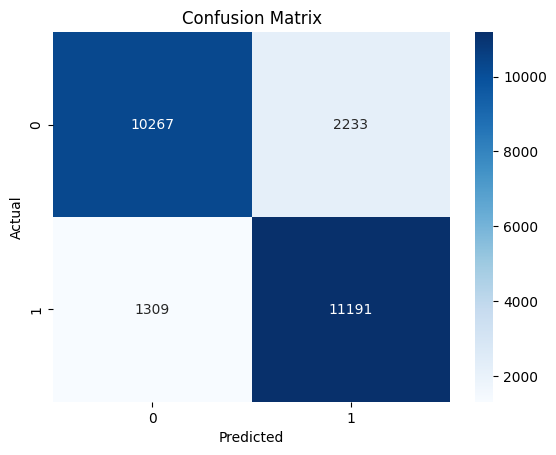

In [10]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

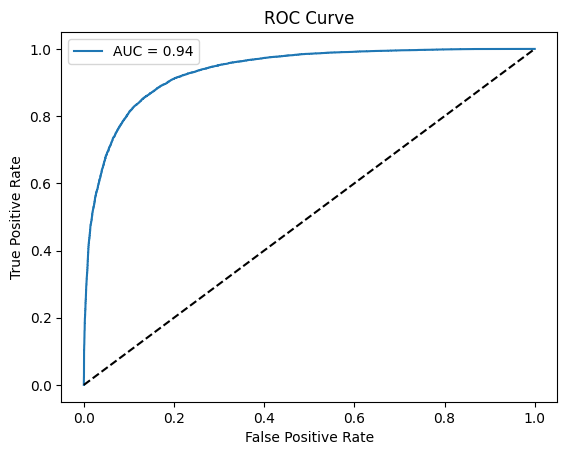

In [11]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

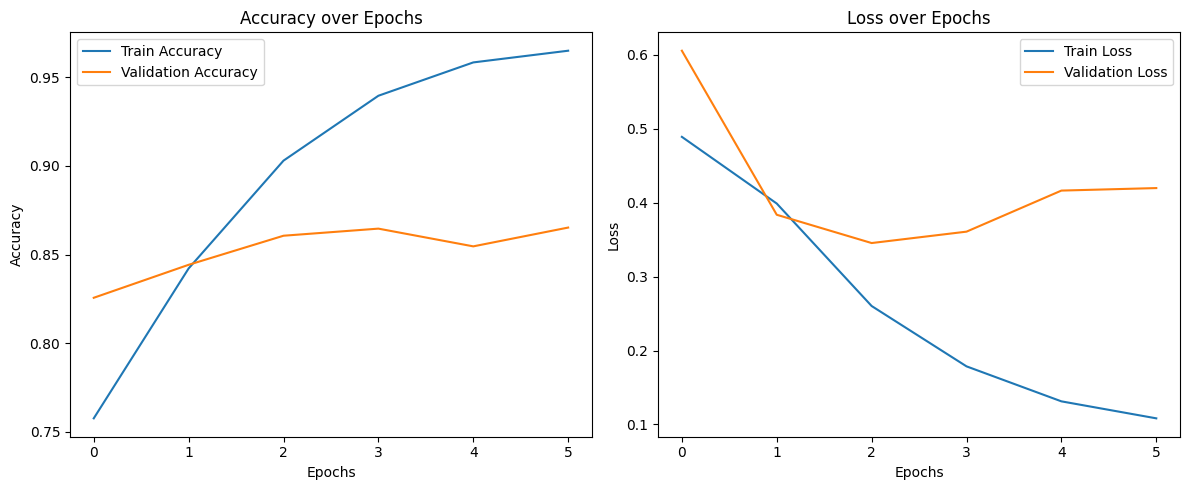

In [12]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

## Hyperparameter Tuning

In [13]:
best_acc = 0
best_config = None

In [14]:
for emb_dim in [64, 128]:
    for lstm_unit in [32, 64]:
        for drop_rate in [0.3, 0.5]:
            print(f"Testing: emb_dim={emb_dim}, lstm_units={lstm_unit}, dropout={drop_rate}")
            model_tune = create_deep_rnn_model(emb_dim, lstm_unit, drop_rate)
            hist_tune = model_tune.fit(x_train, y_train,
                                       epochs=5,
                                       batch_size=128,
                                       validation_split=0.2,
                                       verbose=0)
            val_acc = hist_tune.history['val_accuracy'][-1]
            print(f"Validation Accuracy: {val_acc:.4f}")
            if val_acc > best_acc:
                best_acc = val_acc
                best_config = (emb_dim, lstm_unit, drop_rate)

Testing: emb_dim=64, lstm_units=32, dropout=0.3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Validation Accuracy: 0.8430
Testing: emb_dim=64, lstm_units=32, dropout=0.5
Validation Accuracy: 0.8682
Testing: emb_dim=64, lstm_units=64, dropout=0.3
Validation Accuracy: 0.8614
Testing: emb_dim=64, lstm_units=64, dropout=0.5
Validation Accuracy: 0.8530
Testing: emb_dim=128, lstm_units=32, dropout=0.3
Validation Accuracy: 0.8652
Testing: emb_dim=128, lstm_units=32, dropout=0.5
Validation Accuracy: 0.8670
Testing: emb_dim=128, lstm_units=64, dropout=0.3
Validation Accuracy: 0.8620
Testing: emb_dim=128, lstm_units=64, dropout=0.5
Validation Accuracy: 0.8566


In [15]:
print(f"\nBest Config: Embedding={best_config[0]}, LSTM Units={best_config[1]}, Dropout={best_config[2]}")
print(f"Best Validation Accuracy: {best_acc:.4f}")


Best Config: Embedding=64, LSTM Units=32, Dropout=0.5
Best Validation Accuracy: 0.8682
